In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


import tensorflow

In [2]:
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [6]:
df_train = pd.DataFrame(df['Open'], columns={'Open'})

In [7]:
df_train.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [8]:
scalar = MinMaxScaler(feature_range=(0,1))

In [9]:
df_train[['Open']] = scalar.fit_transform(df_train[['Open']])

In [10]:
training_set = df_train['Open']

In [11]:
training_set = list(training_set)

In [12]:
type(training_set)

list

In [13]:
X_train = []
y_train = []
for i in range(60, len(training_set)):
    X_train.append(training_set[i-60:i])
    y_train.append(training_set[i])
    

In [14]:
training_set[60]

0.08627874097775134

In [15]:
y_train[0]

0.08627874097775134

In [16]:
regressor = Sequential()

In [17]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
type(X_train)

numpy.ndarray

In [19]:
type(y_train)

numpy.ndarray

In [20]:
X_train.shape

(1198, 60)

In [21]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [22]:
X_train.shape

(1198, 60, 1)

In [23]:
input_shape = (60,1)

regressor.add(LSTM(units = 100, return_sequences = True, input_shape = input_shape))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.45))

regressor.add(Dense(units=1))



In [24]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 100)           40800     
_________________________________________________________________
dropout (Dropout)            (None, 60, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 100)           80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 100)           80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               8

In [26]:
model = regressor.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
38/38 [==============================] - 12s 165ms/step - loss: 0.0345
Epoch 2/10
38/38 [==============================] - 6s 164ms/step - loss: 0.0076
Epoch 3/10
38/38 [==============================] - 6s 163ms/step - loss: 0.0065
Epoch 4/10
38/38 [==============================] - 6s 165ms/step - loss: 0.0074
Epoch 5/10
38/38 [==============================] - 6s 162ms/step - loss: 0.0067
Epoch 6/10
38/38 [==============================] - 6s 170ms/step - loss: 0.0065
Epoch 7/10
38/38 [==============================] - 6s 162ms/step - loss: 0.0058
Epoch 8/10
38/38 [==============================] - 8s 206ms/step - loss: 0.0058
Epoch 9/10
38/38 [==============================] - 8s 195ms/step - loss: 0.0058
Epoch 10/10
38/38 [==============================] - 6s 165ms/step - loss: 0.0063


In [27]:
y_train_pred = regressor.predict(X_train)

In [28]:
data_points = [i for i in range(len(y_train))]

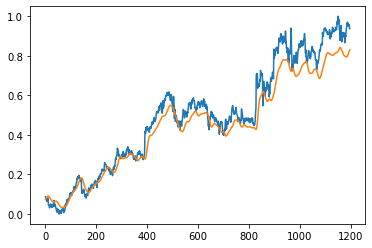

In [29]:
plt.plot(data_points, y_train)
plt.plot(data_points, y_train_pred)
plt.show()


In [30]:
df_results = pd.DataFrame()

In [31]:
df_results['Actual_result'] = y_train

In [32]:
df_results.head()

,Actual_result
0,0.086279
1,0.084716
2,0.074541
3,0.078838
4,0.072383


In [33]:
y_train_pred_inverse = scalar.inverse_transform(y_train_pred)

In [34]:
y_train.shape

(1198,)

In [35]:
y_train_pred_inverse.shape

(1198, 1)

In [36]:
y_train_inverse = y_train.reshape(y_train.shape[0], 1)

In [45]:
df1 = pd.read_csv('Google_Stock_Price_Train.csv')

In [44]:
df_result = pd.DataFrame()

In [47]:
y_train_pred_inverse

array([[318.6943 ],
       [319.88943],
       [321.16974],
       ...,
       [722.443  ],
       [724.04126],
       [725.3469 ]], dtype=float32)

In [48]:
y_train_inverse.shape

(1198, 1)

In [52]:
y_train_pred_inverse = y_train_pred_inverse.reshape(y_train_pred_inverse.shape[0])

In [53]:
y_train_pred_inverse.shape

(1198,)

In [54]:
y_train_pred_inverse

array([318.6943 , 319.88943, 321.16974, ..., 722.443  , 724.04126,
       725.3469 ], dtype=float32)

In [55]:
df_result['Predicted'] = y_train_pred_inverse

In [56]:
df1.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [57]:
df_result['Actual'] = df1['Open']

In [58]:
df_result.head()

,Predicted,Actual
0,318.694305,325.25
1,319.889435,331.27
2,321.169739,329.83
3,322.466187,328.34
4,323.717621,322.04


In [59]:
df_result['Predicted'] = df_result['Predicted'].apply(lambda x: round(x, 2))

In [60]:
df_result.head(10)

,Predicted,Actual
0,318.69,325.25
1,319.89,331.27
2,321.17,329.83
3,322.47,328.34
4,323.72,322.04
5,324.86,313.70
6,325.84,310.59
7,326.59,314.43
8,327.10,311.96
9,327.39,314.81


In [61]:
from sklearn.metrics import r2_score

In [62]:
print(r2_score(df_result['Actual'], df_result['Predicted']))

0.8981828776170504
